# Домашнее задание

## Учимся работе с данными - от загрузки до моделирования

### Часть 1. EDA

**Цель:**

Датасет по раку груди. Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность и т.д. Целевая переменная — диагноз, является ли новообразование злокачественным или нет.



In [32]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)
sns.set_theme("notebook")

#### 1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [33]:
raw_data = pd.read_csv('data.csv')

#### 2. Посмотрите на базовые статистики датасета: средние, медианы и т.д.

In [34]:
# Размер датасета
print(f"Количество строк в датасете : {raw_data.shape[0]}")
print(f"Количество колонок в датасете : {raw_data.shape[1]}")

print("\n\nКолонки датасета:")
print(raw_data.columns)

# Просмотр информации о даиасете
print("\n\nИнформация о датасете:")
print(raw_data.info())

# Просмотр статистики катасета
print("\n\nСтатистика датасета:")
print(raw_data.describe())

# Просмотр информации о количестве уникальных значений
print("\n\nИнформации о количестве уникальных значений:")
print(raw_data.nunique() )


Количество строк в датасете : 569
Количество колонок в датасете : 33


Колонки датасета:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id 

Удалим лишние столбецы датасета -- "Unnamed: 32" и "id" и заменим категориальный признак "B" "M" на 0 и 1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

c_data = raw_data.drop(columns=['Unnamed: 32','id'])

enc = OrdinalEncoder()
data_enc=c_data.copy()
data_enc[['diagnosis']] = enc.fit_transform(data_enc[['diagnosis']])


#### 3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

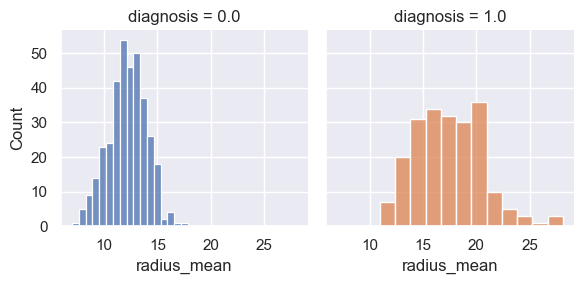

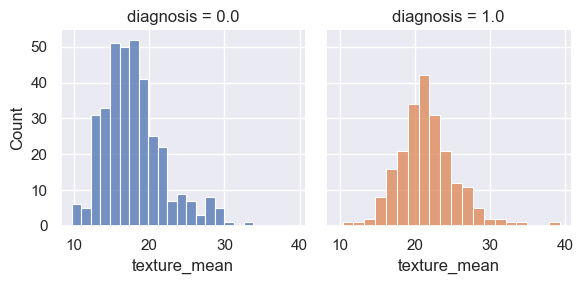

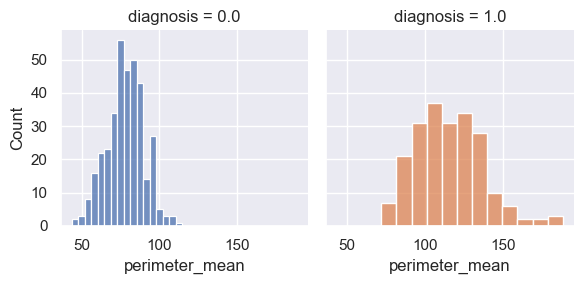

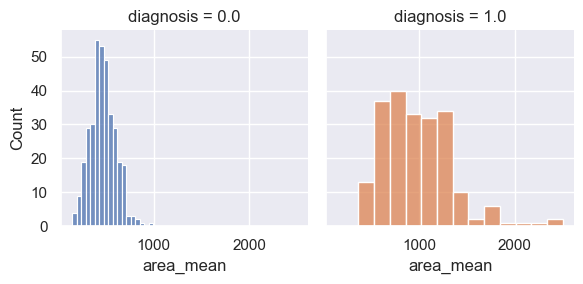

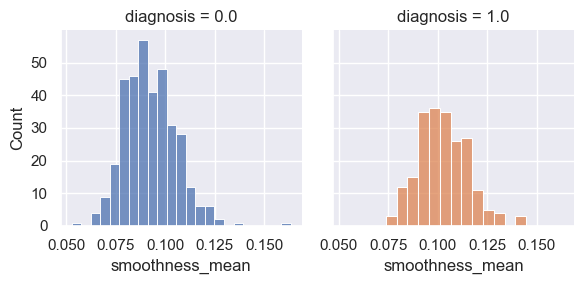

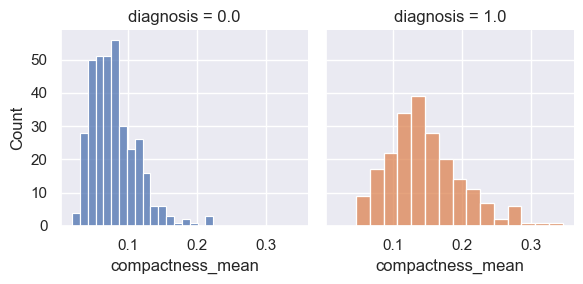

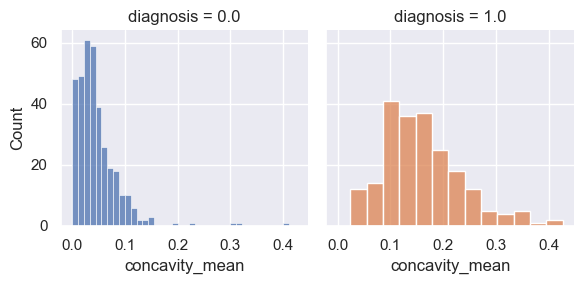

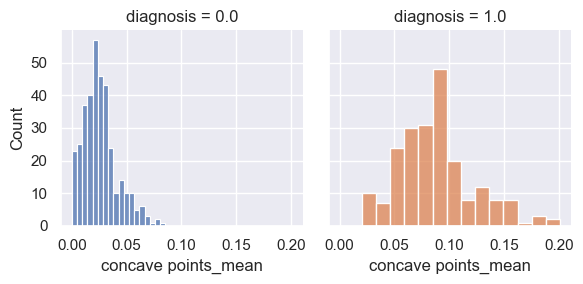

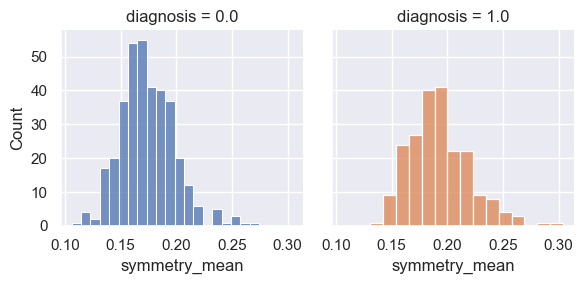

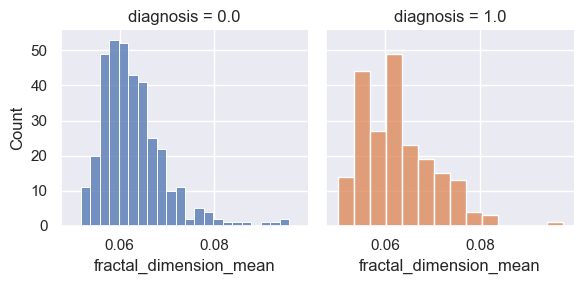

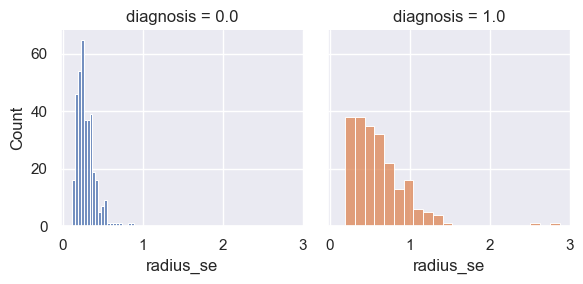

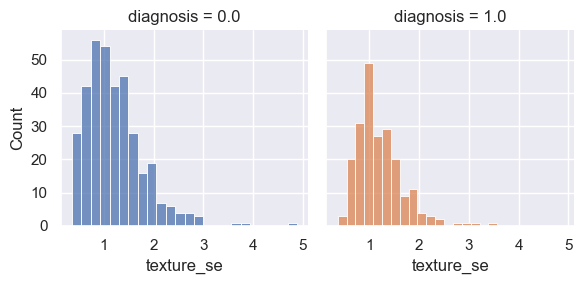

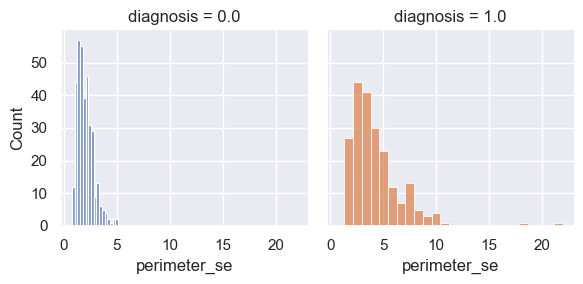

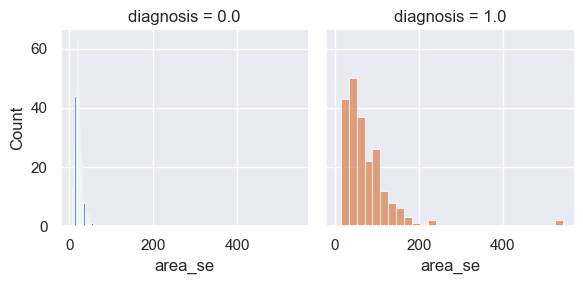

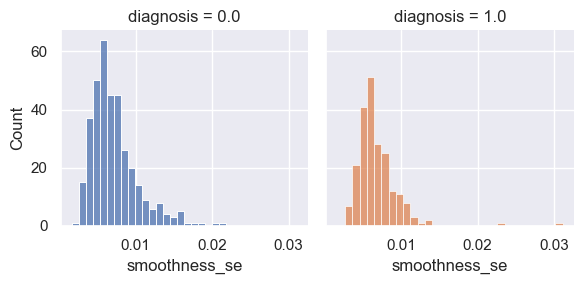

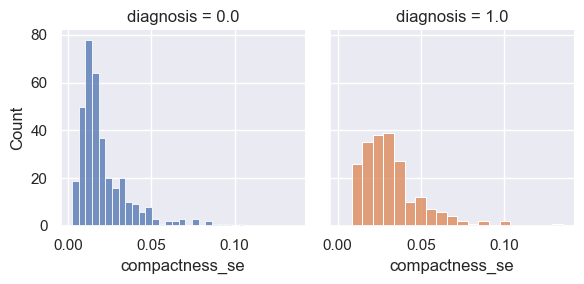

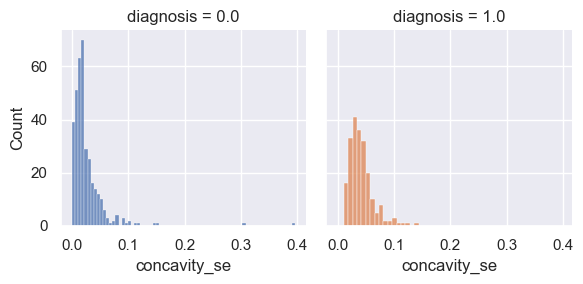

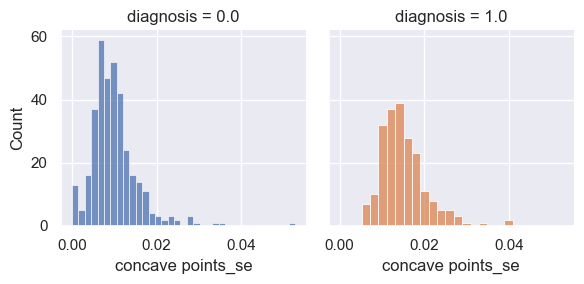

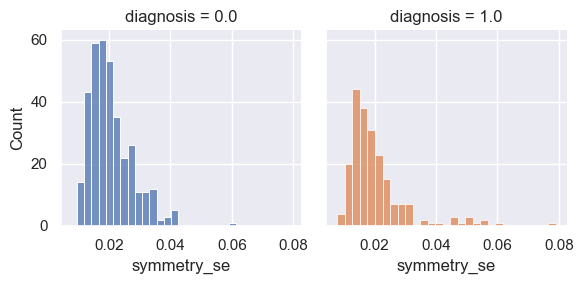

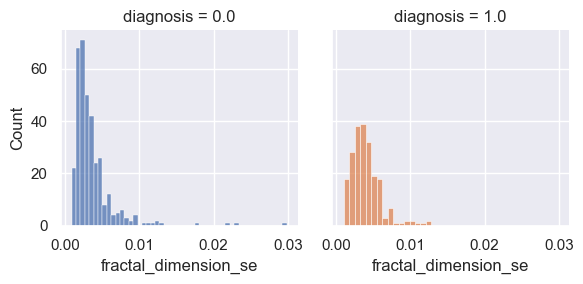

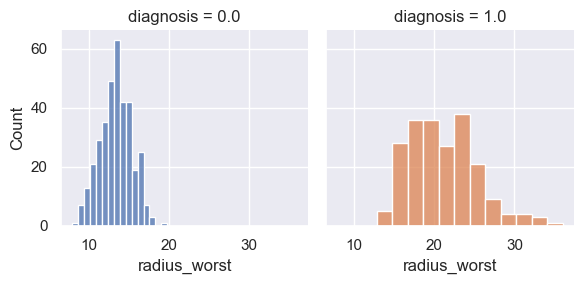

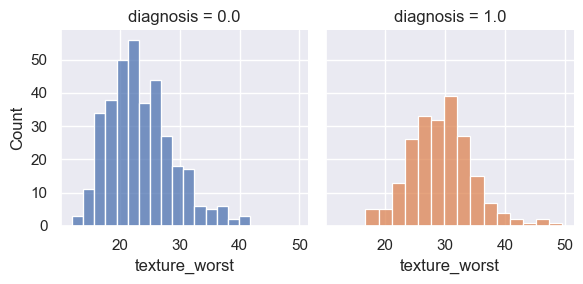

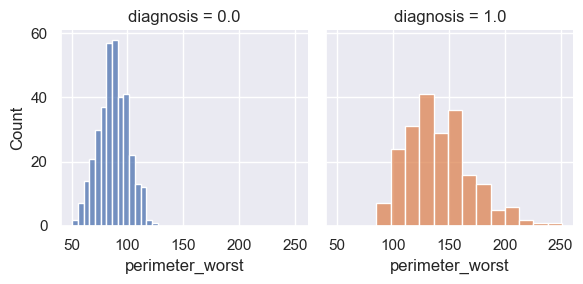

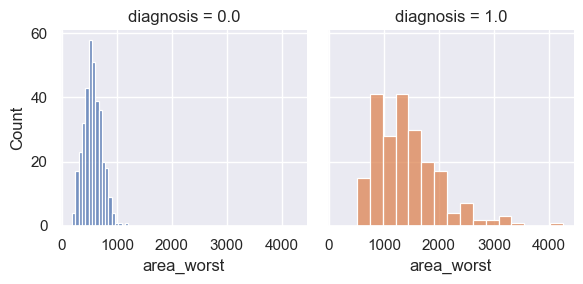

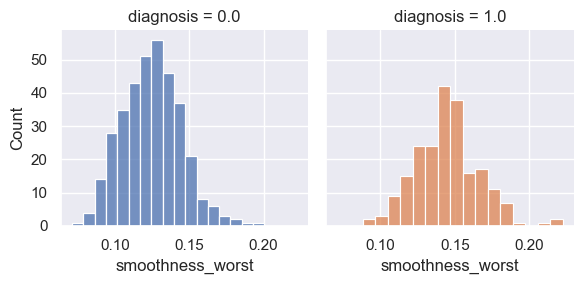

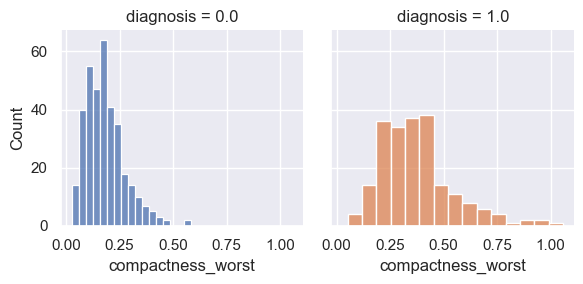

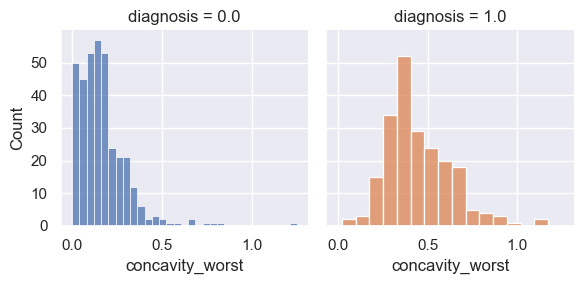

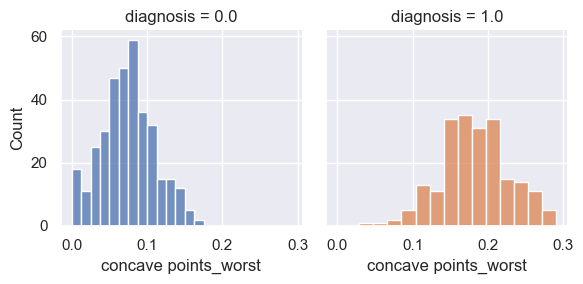

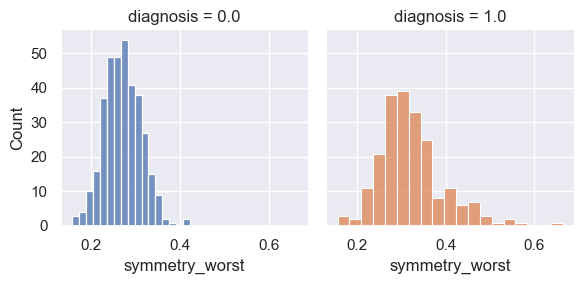

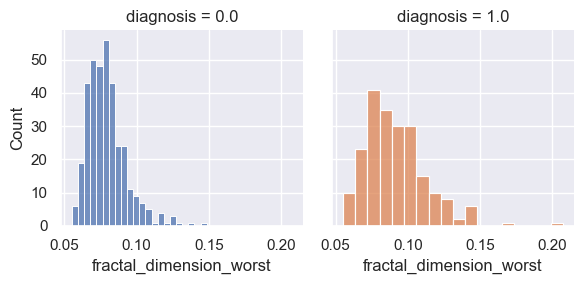

In [36]:
from scipy import stats

plot_cols=data_enc.columns.drop('diagnosis')
for i in plot_cols:

    sns.FacetGrid(data_enc,col='diagnosis',hue='diagnosis').map(sns.histplot, i)


#### 4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки? 

Сильно скорелированные признаки
Perimeter_Mean и radius_mean уровень корреляции 0.9978552814938109
Perimeter_Worst и radius_worst уровень корреляции 0.993707916102949
Area_Mean и radius_mean уровень корреляции 0.9873571700566127
Area_Worst и radius_worst уровень корреляции 0.9840145644590742
Perimeter_Se и radius_se уровень корреляции 0.9727936770160764
Perimeter_Worst и perimeter_mean уровень корреляции 0.9703868870426394
Radius_Worst и radius_mean уровень корреляции 0.9695389726112055
Radius_Worst и perimeter_mean уровень корреляции 0.9694763634663146
Perimeter_Worst и radius_mean уровень корреляции 0.9651365139559871
Radius_Worst и area_mean уровень корреляции 0.9627460860470841
Area_Worst и area_mean уровень корреляции 0.9592133256498998
Perimeter_Worst и area_mean уровень корреляции 0.9591195743552645
Area_Se и radius_se уровень корреляции 0.951830112110991
Area_Worst и perimeter_mean уровень корреляции 0.9415498080023068
Area_Worst и radius_mean уровень корреляции 0.9410824595860

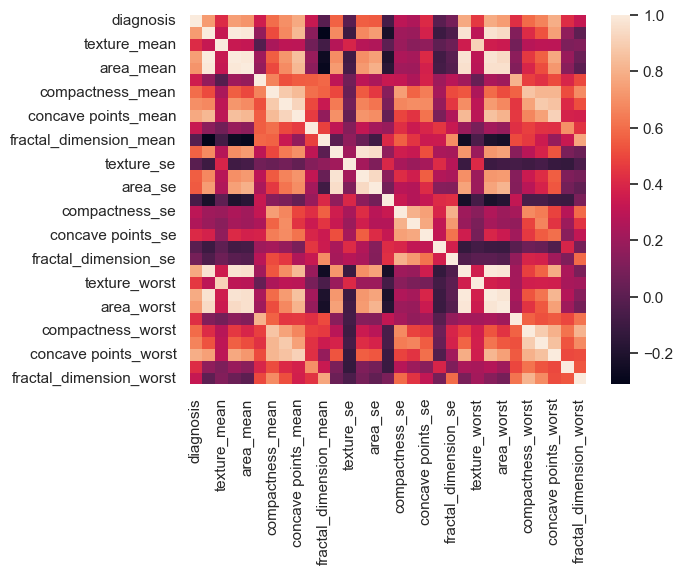

In [37]:
# Отрисуем тепловую карту
corr_matrix=data_enc.corr()
sns.heatmap(corr_matrix)

# Создадим список коредяций всего со всем из вернего треугольника матрицы кореляций
corr_list=[]
corr_val_array=corr_matrix.to_numpy()
for i in range(corr_matrix.columns.shape[0]):
    for j in range(i-1):
        corr_list.append((corr_val_array[j,i],corr_matrix.columns[i].title(),corr_matrix.index[j]))

import operator
corr_list.sort(key=operator.itemgetter(0),reverse=True)   

# Установим отсечку в 0.9
threshold = 0.9

print("Сильно скорелированные признаки")
for i in corr_list:
    if i[0]<threshold:
        break
    print(f"{i[1]} и {i[2]} уровень корреляции {i[0]}")

#### 5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость? 

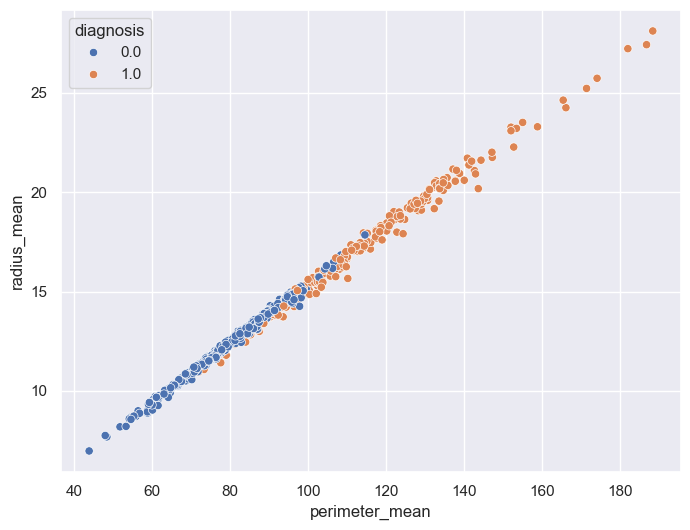

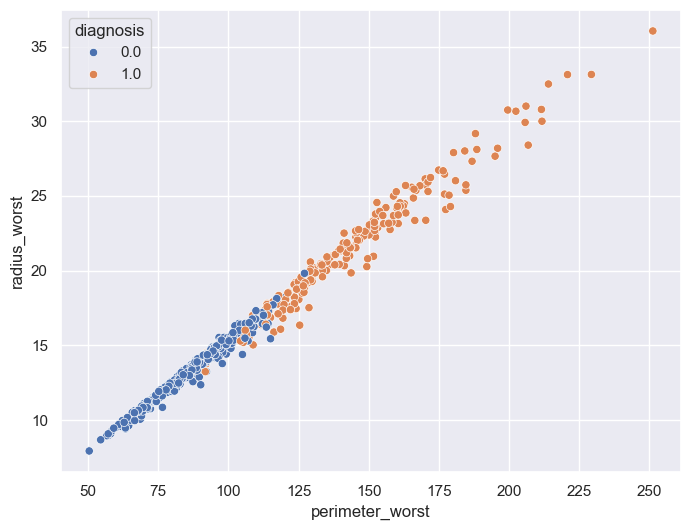

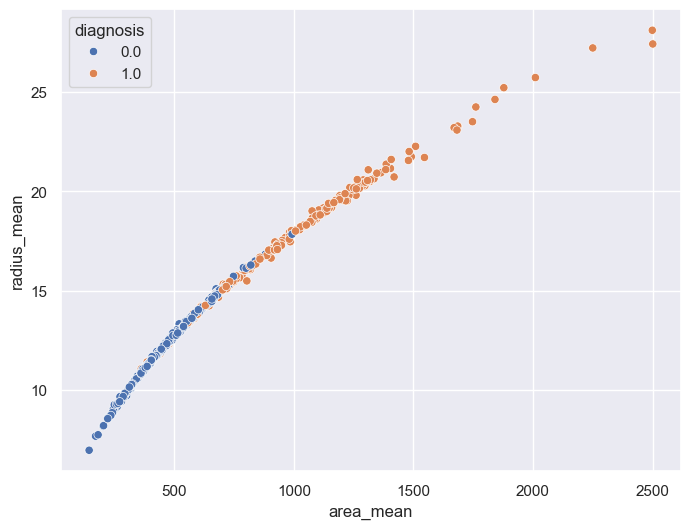

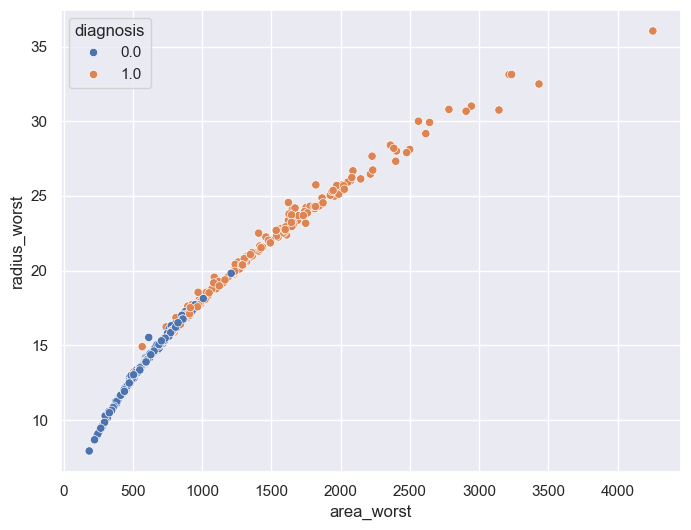

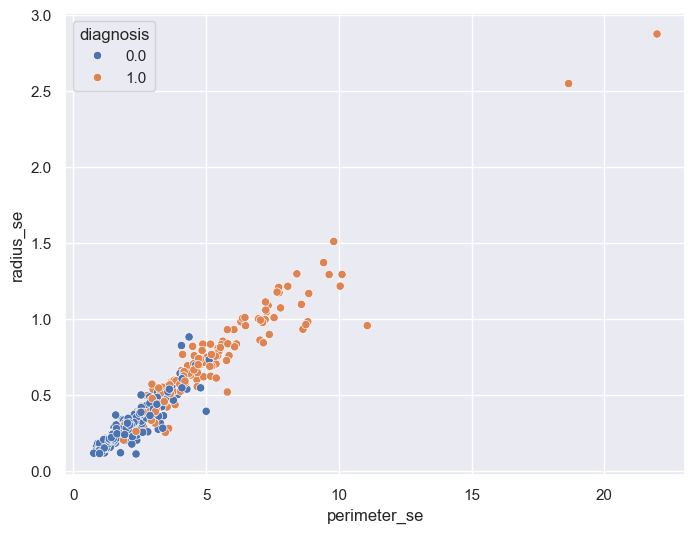

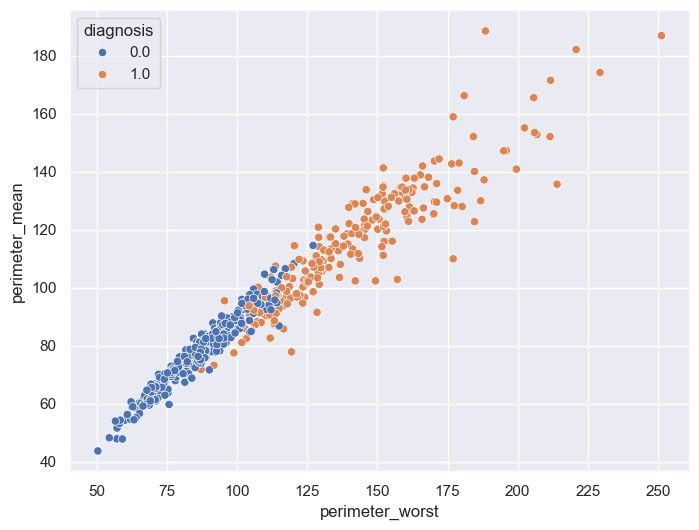

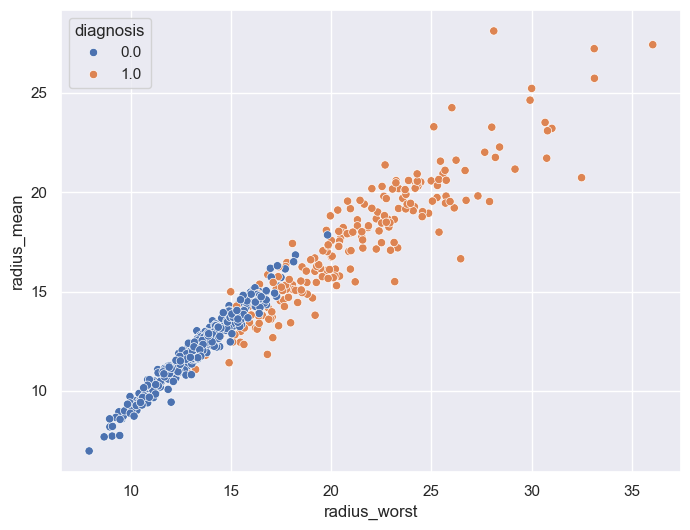

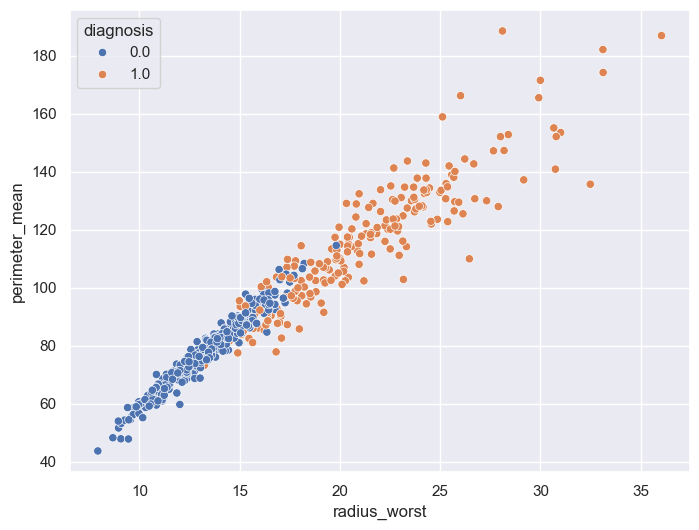

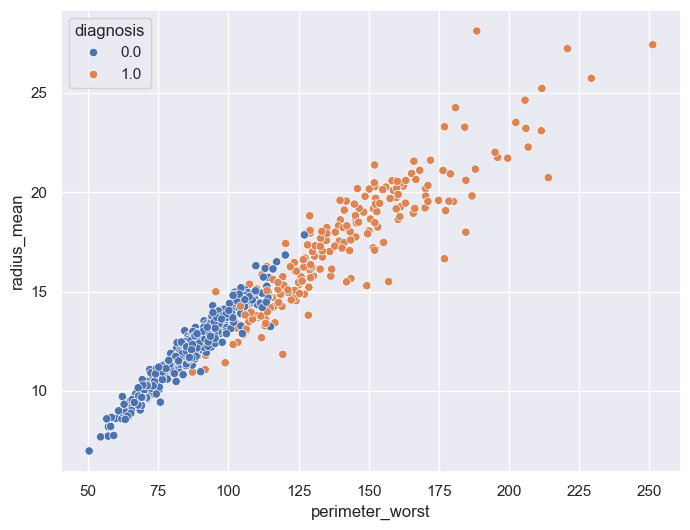

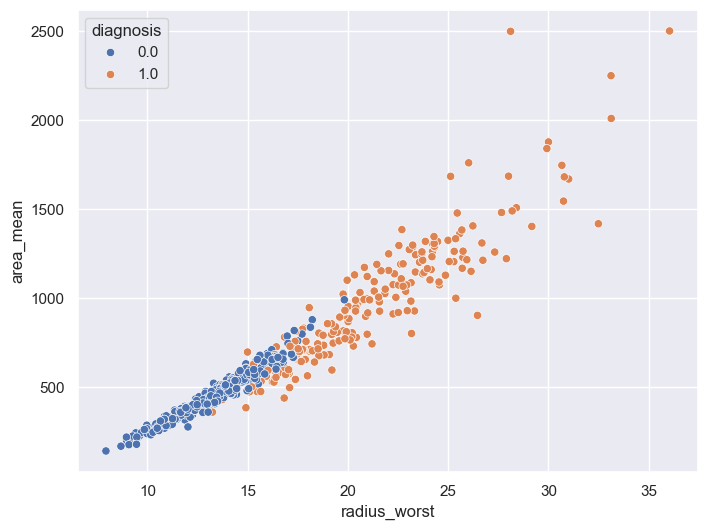

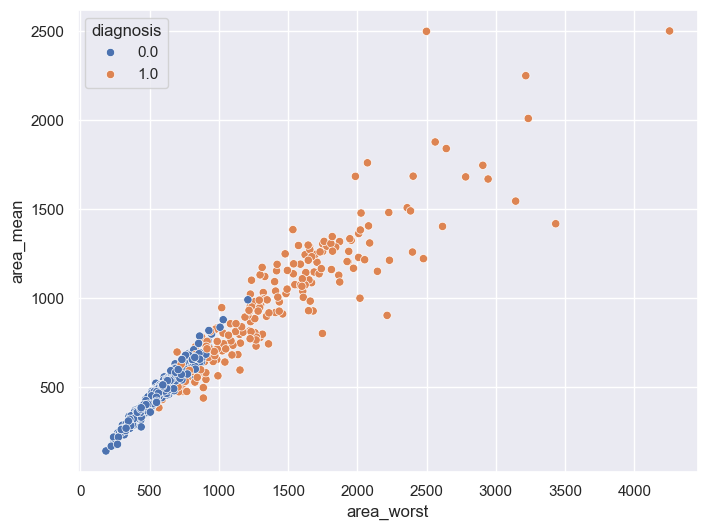

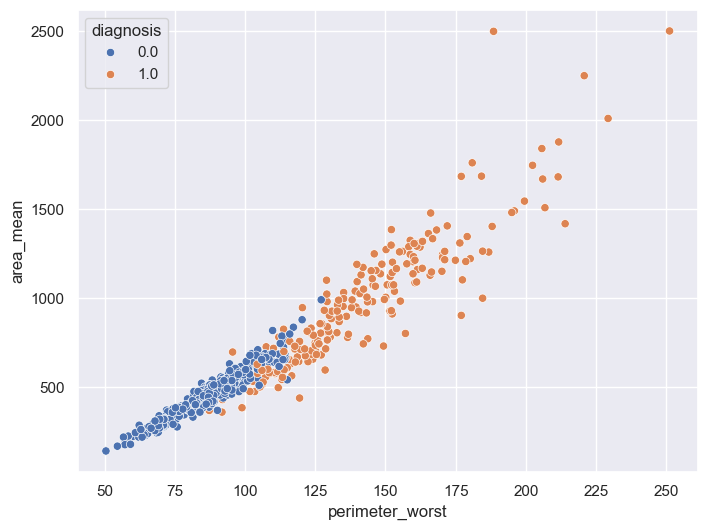

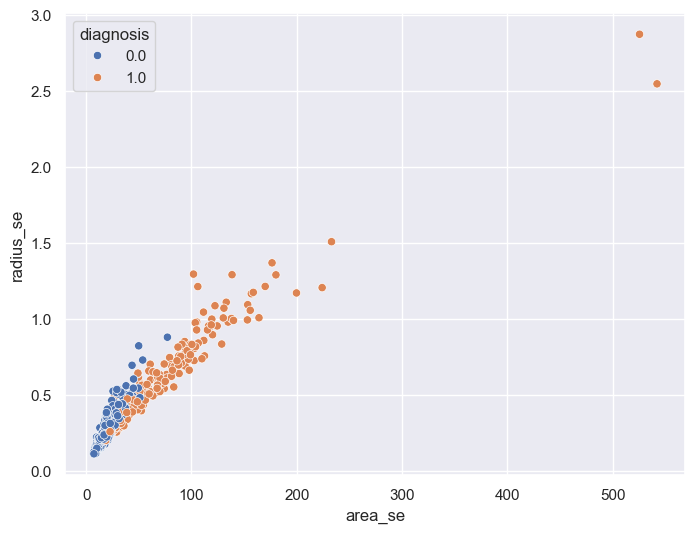

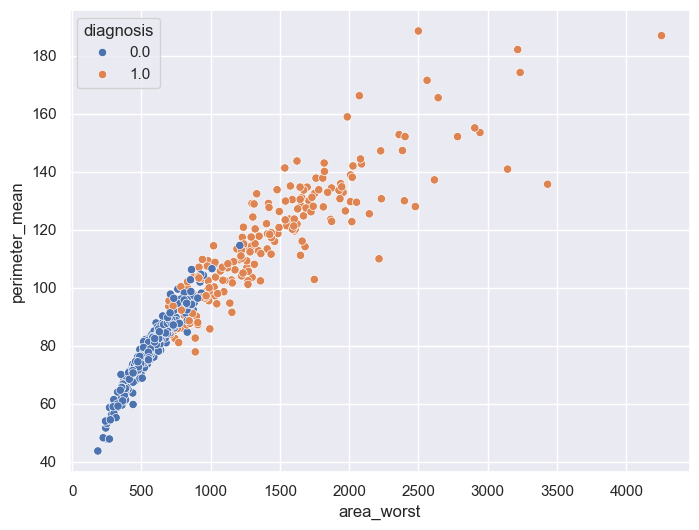

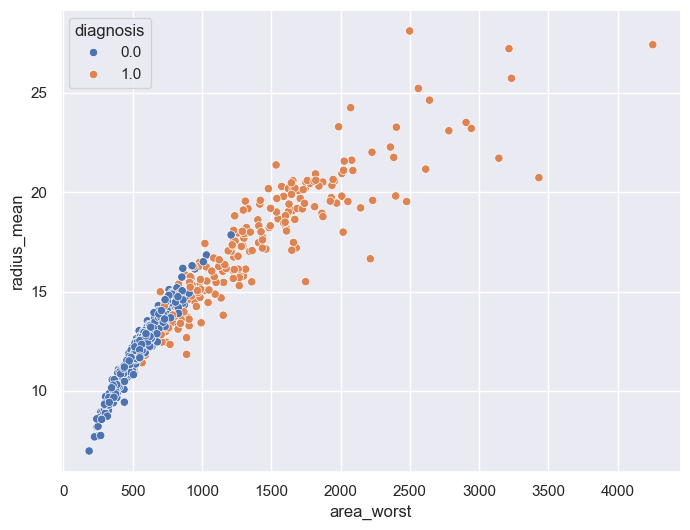

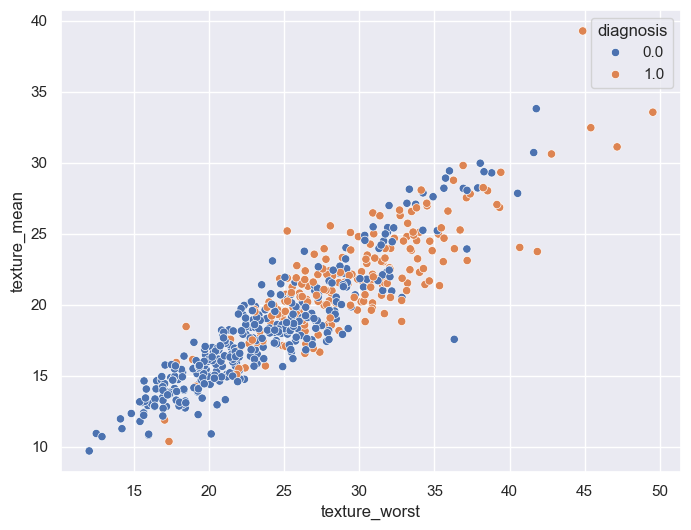

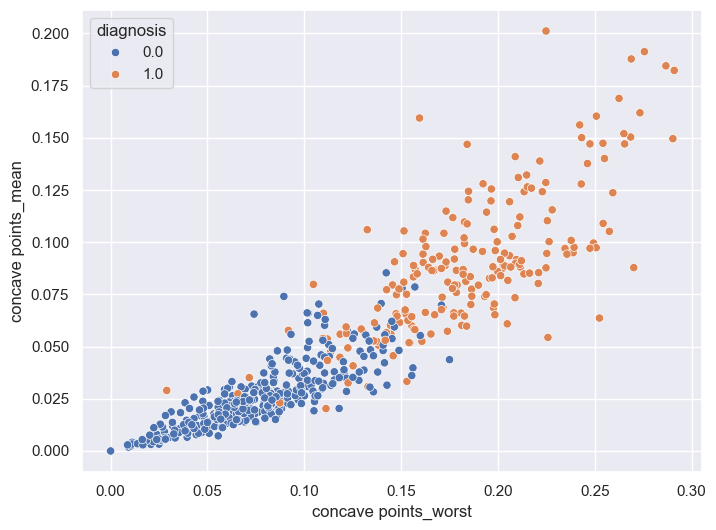

In [38]:
for i in corr_list:
    if i[0]<threshold:
        break
    plt.figure(figsize=(8, 6))

    sns.scatterplot(x=str(i[1]).lower(),y=str(i[2]).lower(),data=data_enc, hue='diagnosis')
    plt.show()


   #### 6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.


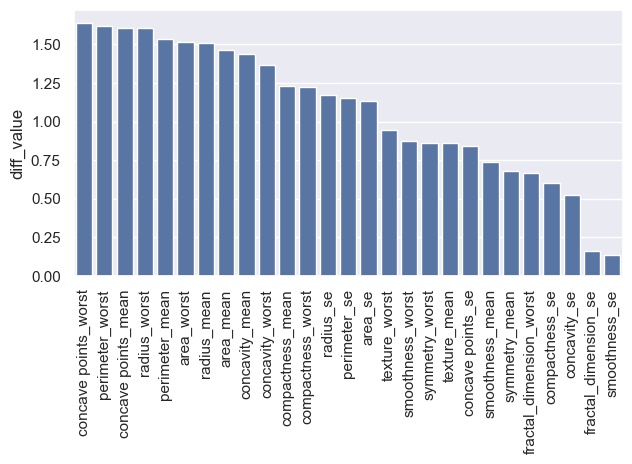

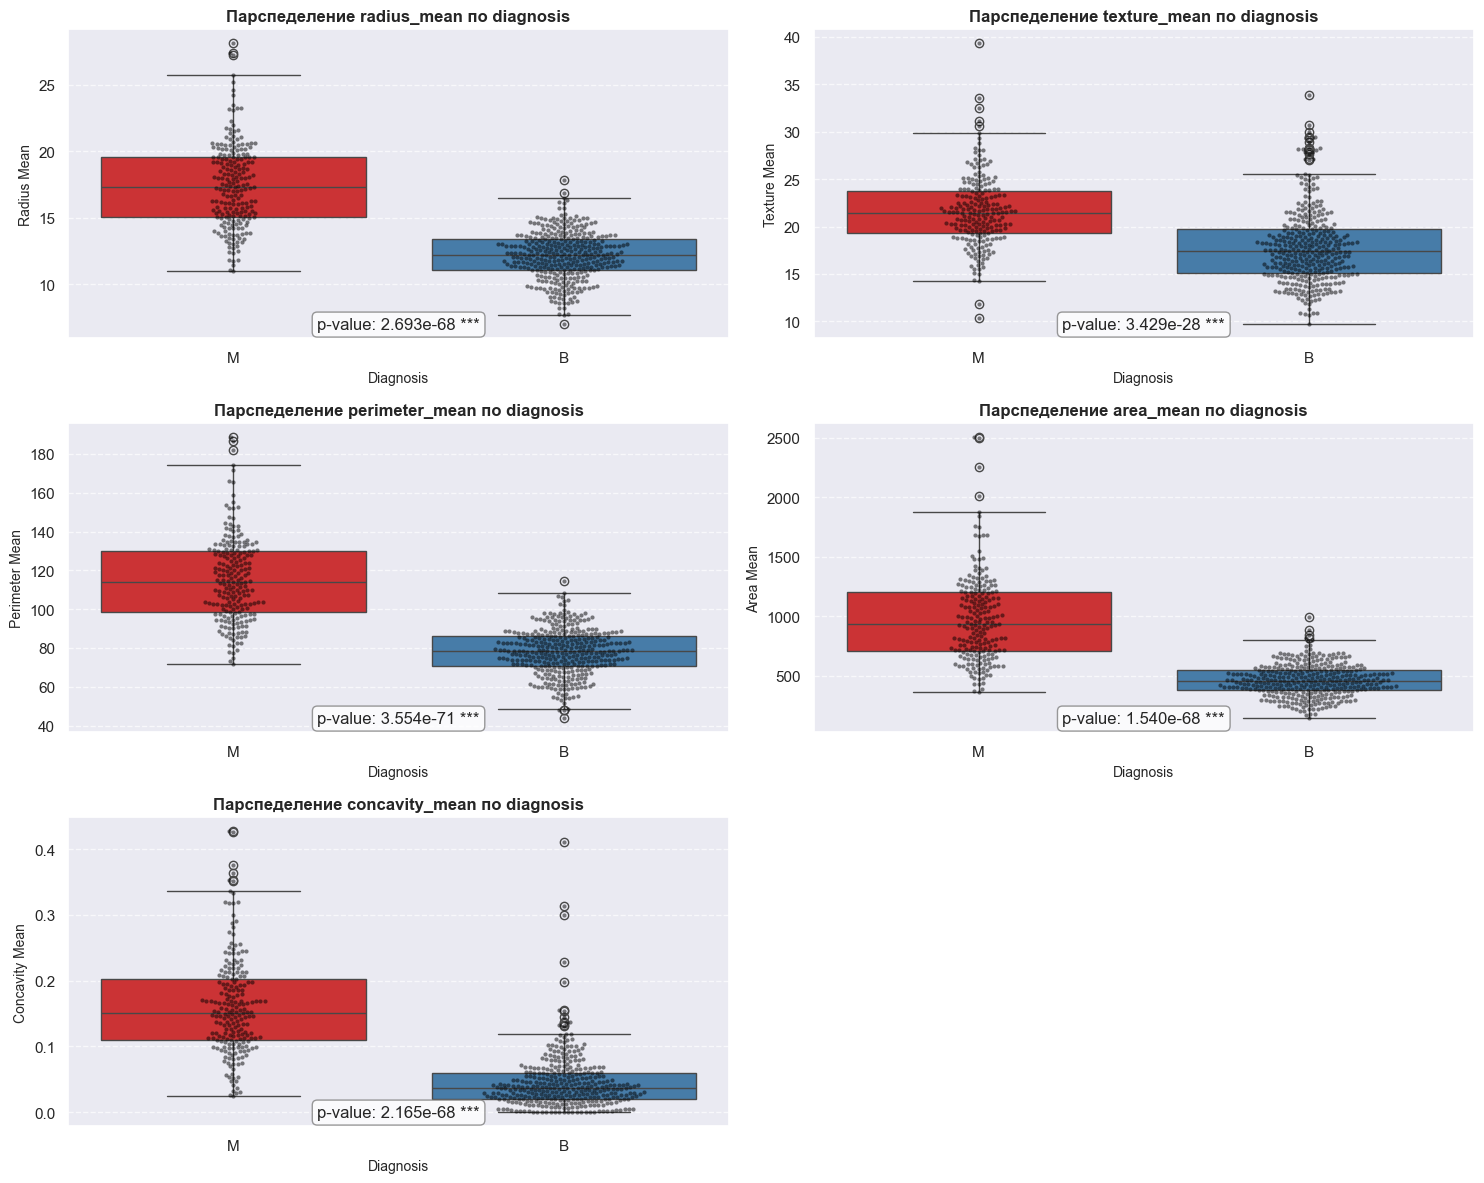

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,QuantileTransformer

scaler=StandardScaler() 

cols = data_enc.columns[data_enc.columns != 'diagnosis']
scaled_data=data_enc.copy()

scaled_data[cols]=scaler.fit_transform(data_enc[cols])
scaled_df = pd.DataFrame(scaled_data, columns=data_enc.columns)
dd=scaled_df.groupby('diagnosis')

threshold=0.1

# создадим датасет с одним единственным значение - разницой среднего между сгруппированными по диагнозу 
df=pd.DataFrame(abs(dd.mean().loc[1]-dd.mean().loc[0]),columns=['diff_value'])
newdf=df.sort_values(ascending=False, by='diff_value')
newdf.drop(newdf[newdf['diff_value'] < threshold].index, inplace=True)

sns.barplot(newdf['diff_value'])
plt.xticks(rotation=90)
plt.tight_layout()


# Выбираем несколько важных признаков на основе полученнной гистограммы
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

# Рассчитываем количество строк и столбцов для подграфиков
n_features = len(important_features)
n_cols = 2 
n_rows = int(np.ceil(n_features / n_cols))

# Создаем фигуру и подграфики
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten() if n_features > 1 else [axes]

# Создаем boxplot с дополнительными улучшениями
for i, feature in enumerate(important_features):
    if i < len(axes):
        # Добавляем boxplot
        sns.boxplot(x='diagnosis', y=feature, data=c_data, ax=axes[i], palette="Set1")
        
        # Добавляем swarmplot для отображения отдельных точек данных
        sns.swarmplot(x='diagnosis', y=feature, data=c_data, ax=axes[i], color='black', alpha=0.5, size=3)
        
        # Улучшаем заголовок и метки
        axes[i].set_title(f'Парспеделение {feature} по diagnosis', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('diagnosis'.capitalize(), fontsize=10)
        axes[i].set_ylabel(feature.replace('_', ' ').title(), fontsize=10)
        
        # Добавляем статистический тест (тест Манна-Уитни)
        group_0 = c_data[c_data['diagnosis'] == 'B'][feature] if isinstance(c_data['diagnosis'].iloc[0], str) else c_data[c_data['diagnosis'] == 0][feature]
        group_1 = c_data[c_data['diagnosis'] == 'M'][feature] if isinstance(c_data['diagnosis'].iloc[0], str) else c_data[c_data['diagnosis'] == 1][feature]
        
        stat, p_value = stats.mannwhitneyu(group_0, group_1)
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        
        axes[i].annotate(f'p-value: {p_value:.3e} {significance}', 
                        xy=(0.5, 0.02), 
                        xycoords='axes fraction',
                        ha='center', 
                        va='bottom',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        
        # Добавляем сетку для лучшей читаемости
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Скрываем неиспользуемые подграфики
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Регулируем расположение
plt.tight_layout()




### Часть 2. Моделирование при помощи kNN

### 1. Разбейте данные на train-test, отложив 30% выборки для тестирования.


In [40]:
from sklearn.model_selection import train_test_split

X_data = data_enc.drop(['diagnosis'], axis=1)
y_data = data_enc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

### 2.Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [41]:
# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 3.Постройте модель kNN «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

ROC-AUC  0.988
accuracy 0.9649122807017544
precision 0.90625
recall 1.0
f1_score 0.9508196721311475


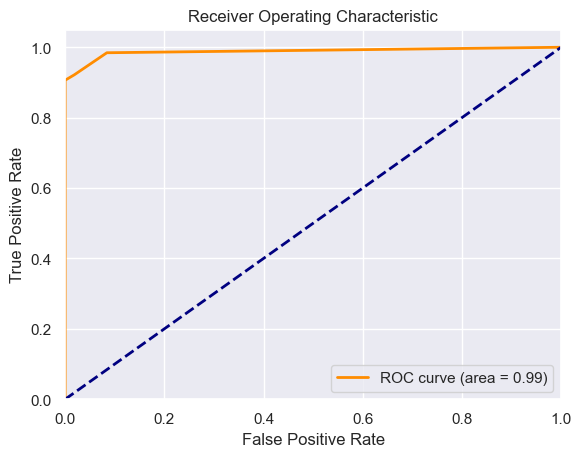

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

prediction=knn.predict(X_test_scaled)

accuracy=accuracy_score(prediction, y_test)
f1 = f1_score(prediction, y_test)
precision=precision_score(prediction, y_test)  
recall=recall_score(prediction, y_test)

print('ROC-AUC ', round(roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1]),3))
print(f"accuracy {accuracy}")
print(f"precision {precision}")
print(f"recall {recall}")
print(f"f1_score {f1}")
       
# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])

# Вычисляем AUC
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()